## Import libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 900)
pd.set_option('display.max_columns', None)
import seaborn as sns

## Import csv files: source https://fred.stlouisfed.org/

In [2]:
unrate_all = pd.read_csv("UNRATE_NSA.csv")
unrate_all

,DATE,UNRATENSA
0,1948-01-01,4.0
1,1948-02-01,4.7
2,1948-03-01,4.5
3,1948-04-01,4.0
4,1948-05-01,3.4
5,1948-06-01,3.9
6,1948-07-01,3.9
7,1948-08-01,3.6
8,1948-09-01,3.4
9,1948-10-01,2.9


# Wrangling:

## File names are surrogate keys, so must rename.

In [3]:
#add variables for each demographic/industry and change number at the end to how many demographic/industries
[unrate_women, unrate_men, unrate_aa, unrate_latino, unrate_white, unrate_asian, unrate_agr, unrate_cnstrct, unrate_lsr_hspt, 
unrate_mnfct, unrate_ed_hlth_svces, unrate_farm_fish_forest, unrate_fin, unrate_info, unrate_mgmt_fin_ops, unrate_mining_etc, 
unrate_natres_maint, unrate_office_admin, unrate_pro, unrate_pro_bus, unrate_prod, unrate_sales, unrate_self, unrate_svce, 
unrate_transp_util, unrate_whlsl_rtl] = [""] * 26

#follow this format with additional demographics/industries
features = [[unrate_women,"UNRATE_WOMEN.csv"], [unrate_men, "UNRATE_MEN.csv"], [unrate_aa,"UNRATE_AA.csv"], 
            [unrate_latino,"UNRATE_LATINO.csv"], [unrate_white, "UNRATE_WHITE.csv"],  [unrate_asian, "UNRATE_ASIAN.csv"],
            #Industries!
            [unrate_agr, 'UNRATE_AGR.csv'], [unrate_cnstrct, 'UNRATE_CNSTRCT.csv'], [unrate_lsr_hspt, 'UNRATE_LSR_HSPT.csv'], 
            [unrate_mnfct, 'UNRATE_MNFCT.csv'], [unrate_ed_hlth_svces, 'UNRATE_ED_HLTH_SVCES.csv'], 
            [unrate_farm_fish_forest, 'UNRATE_FARM_FISH_FOREST.csv'], [unrate_fin, 'UNRATE_FIN.csv'], 
            [unrate_info, 'UNRATE_INFO.csv'], [unrate_mgmt_fin_ops, 'UNRATE_MGMT_FIN_OPS.csv'], 
            [unrate_mining_etc, 'UNRATE_MINING_ETC.csv'], [unrate_natres_maint, 'UNRATE_NATRES_MAINT.csv'], 
            [unrate_office_admin, 'UNRATE_OFFICE_ADMIN.csv'], [unrate_pro, 'UNRATE_PRO.csv'], 
            [unrate_pro_bus, 'UNRATE_PRO_BUS.csv'], [unrate_prod, 'UNRATE_PROD.csv'], [unrate_sales, 'UNRATE_SALES.csv'], 
            [unrate_self, 'UNRATE_SELF.csv'], [unrate_svce, 'UNRATE_SVCE.csv'], [unrate_transp_util, 'UNRATE_TRANSP_UTIL.csv'], 
            [unrate_whlsl_rtl, 'UNRATE_WHLSL_RTL.csv']]   

In [4]:
for index in range(len(features)):
    features[index][0] = pd.read_csv(features[index][1])
    features[index][0] = features[index][0].rename(columns = {features[index][0].columns[1]: features[index][1][:-4]})
    unrate_all = pd.merge(unrate_all, features[index][0], how="outer")

## Check for null values

In [5]:
unrate_all.isnull().sum()

DATE                         0
UNRATENSA                    0
UNRATE_WOMEN                 0
UNRATE_MEN                   0
UNRATE_AA                  288
UNRATE_LATINO              302
UNRATE_WHITE                72
UNRATE_ASIAN               624
UNRATE_AGR                 624
UNRATE_CNSTRCT             624
UNRATE_LSR_HSPT            624
UNRATE_MNFCT               624
UNRATE_ED_HLTH_SVCES       624
UNRATE_FARM_FISH_FOREST    624
UNRATE_FIN                 624
UNRATE_INFO                624
UNRATE_MGMT_FIN_OPS        624
UNRATE_MINING_ETC          624
UNRATE_NATRES_MAINT        624
UNRATE_OFFICE_ADMIN        624
UNRATE_PRO                 624
UNRATE_PRO_BUS             624
UNRATE_PROD                624
UNRATE_SALES               624
UNRATE_SELF                624
UNRATE_SVCE                624
UNRATE_TRANSP_UTIL         624
UNRATE_WHLSL_RTL           624
dtype: int64

## Isolate dataset

In [6]:
unrate_all.iloc[624:,:] #Rows 624 and above, All columns

,DATE,UNRATENSA,UNRATE_WOMEN,UNRATE_MEN,UNRATE_AA,UNRATE_LATINO,UNRATE_WHITE,UNRATE_ASIAN,UNRATE_AGR,UNRATE_CNSTRCT,UNRATE_LSR_HSPT,UNRATE_MNFCT,UNRATE_ED_HLTH_SVCES,UNRATE_FARM_FISH_FOREST,UNRATE_FIN,UNRATE_INFO,UNRATE_MGMT_FIN_OPS,UNRATE_MINING_ETC,UNRATE_NATRES_MAINT,UNRATE_OFFICE_ADMIN,UNRATE_PRO,UNRATE_PRO_BUS,UNRATE_PROD,UNRATE_SALES,UNRATE_SELF,UNRATE_SVCE,UNRATE_TRANSP_UTIL,UNRATE_WHLSL_RTL
624,2000-01-01,4.5,4.3,4.6,8.3,6.2,3.9,4.0,10.3,9.7,7.5,3.6,2.3,11.5,2.7,3.4,2.0,3.9,7.3,3.9,1.8,5.7,5.8,4.7,2.3,5.8,4.3,5.0
625,2000-02-01,4.4,4.2,4.7,8.3,6.1,3.9,3.4,11.5,10.6,7.5,3.4,2.2,12.6,2.8,2.9,1.7,5.5,7.8,3.7,1.7,5.2,5.7,4.7,2.5,5.8,4.0,5.2
626,2000-03-01,4.3,4.3,4.3,7.4,6.7,3.8,4.1,10.4,8.7,7.4,3.6,2.5,11.9,2.6,3.6,1.7,3.7,6.6,3.2,1.8,5.4,5.7,4.8,2.0,5.8,3.5,5.1
627,2000-04-01,3.7,3.7,3.7,6.5,5.3,3.2,3.1,8.9,5.8,6.1,3.7,2.1,9.7,2.3,2.4,1.4,4.1,4.8,3.7,1.6,4.5,5.3,3.7,2.0,4.4,3.4,4.1
628,2000-05-01,3.8,4.1,3.6,7.6,5.3,3.3,3.5,5.1,5.0,6.2,3.4,2.7,6.5,2.2,3.5,1.4,5.3,4.4,3.8,1.8,4.7,4.8,4.2,1.9,5.1,3.4,4.3
629,2000-06-01,4.1,4.5,3.9,8.0,5.5,3.6,4.9,6.7,4.6,7.3,3.1,2.9,7.6,2.5,2.6,1.6,2.6,4.5,3.7,2.1,4.4,4.6,4.3,1.8,5.7,3.2,4.4
630,2000-07-01,4.2,4.6,3.8,8.5,5.9,3.6,4.1,5.0,4.4,6.8,3.6,3.1,4.9,2.2,3.6,1.5,3.6,4.0,4.0,2.5,5.1,5.3,4.0,2.1,5.4,3.9,4.1
631,2000-08-01,4.1,4.6,3.6,8.1,5.9,3.5,3.8,7.0,5.1,6.0,3.4,2.9,8.4,2.5,3.7,1.7,5.1,4.4,3.7,2.6,4.8,5.1,4.5,1.7,4.6,3.4,4.3
632,2000-09-01,3.8,4.1,3.5,7.1,5.5,3.3,3.3,8.2,4.6,5.9,3.4,2.6,9.0,2.2,3.3,1.8,5.8,4.4,3.7,1.9,4.6,4.7,3.8,2.0,4.8,4.0,4.1
633,2000-10-01,3.6,3.7,3.5,7.0,4.9,3.1,3.3,8.0,4.9,6.5,3.6,2.1,8.8,2.6,2.4,1.5,7.8,4.1,3.4,1.8,4.1,4.8,3.7,2.2,4.8,2.8,3.7


## Create dataframe with month and year as features

In [7]:
unrate_all['DATE'] = pd.to_datetime(unrate_all['DATE'])
unrate_all_date = unrate_all.copy()
unrate_all_date['YEAR'] = unrate_all_date['DATE'].dt.year
unrate_all_date["MONTH"]= unrate_all_date['DATE'].dt.month

## Reorder columns

In [8]:
unrate_all_date = unrate_all_date.reindex(columns = ['DATE', 'YEAR', 'MONTH', 'UNRATENSA', 'UNRATE_WOMEN', 'UNRATE_MEN', 
                                                     'UNRATE_AA','UNRATE_LATINO', 'UNRATE_WHITE', 'UNRATE_ASIAN', 
                                                     'UNRATE_AGR','UNRATE_CNSTRCT', 'UNRATE_LSR_HSPT', 'UNRATE_MNFCT', 
                                                     'UNRATE_ED_HLTH_SVCES', 'UNRATE_FARM_FISH_FOREST', 'UNRATE_FIN', 
                                                     'UNRATE_INFO', 'UNRATE_MGMT_FIN_OPS', 'UNRATE_MINING_ETC', 
                                                     'UNRATE_NATRES_MAINT', 'UNRATE_OFFICE_ADMIN', 'UNRATE_PRO', 
                                                     'UNRATE_PRO_BUS', 'UNRATE_PROD', 'UNRATE_SALES', 'UNRATE_SELF', 
                                                     'UNRATE_SVCE', 'UNRATE_TRANSP_UTIL', 'UNRATE_WHLSL_RTL'])

# Analysis:

## Men vs Women

<AxesSubplot:xlabel='YEAR', ylabel='value'>

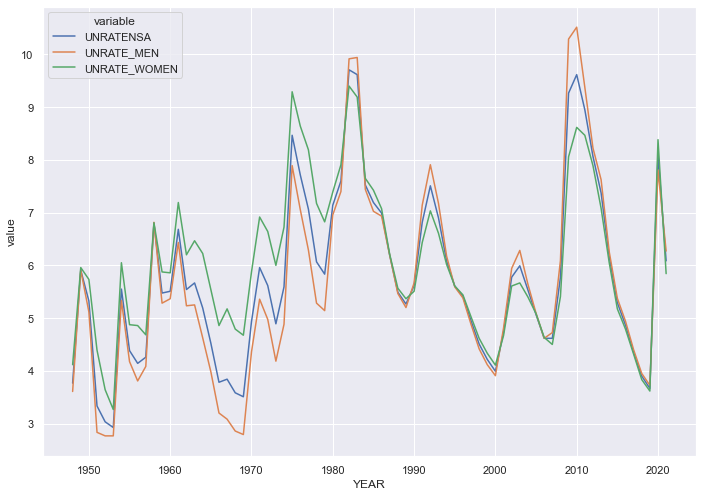

In [9]:
men_and_women = unrate_all_date[['YEAR', "UNRATENSA", "UNRATE_MEN", "UNRATE_WOMEN"]].groupby("YEAR").mean().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='YEAR', y='value', hue='variable', 
             data=pd.melt(men_and_women, ['YEAR']))

## Five of eleven events have women above the national average, four of eleven events have men above the national average.

## Ethnicity/Race

<AxesSubplot:xlabel='YEAR', ylabel='value'>

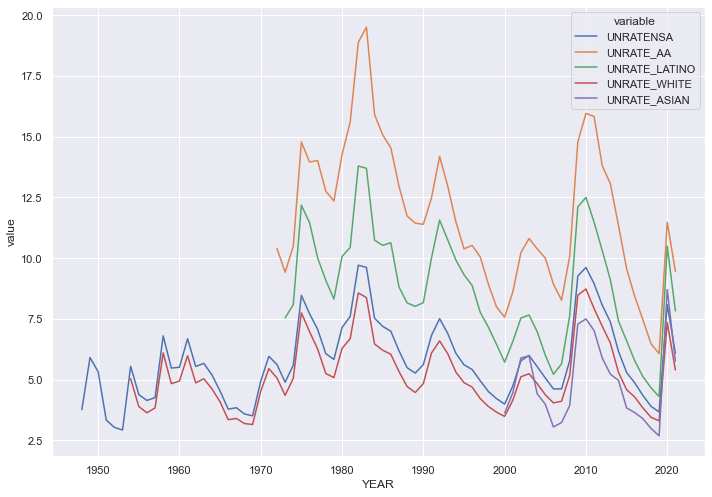

In [10]:
ethnicity_race = unrate_all_date[['YEAR', "UNRATENSA", "UNRATE_AA", "UNRATE_LATINO", "UNRATE_WHITE", 
                                  "UNRATE_ASIAN"]].groupby("YEAR").mean().reset_index()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='YEAR', y='value', hue='variable', 
             data=pd.melt(ethnicity_race, ['YEAR']))

In [ ]:
##

# Regression:

In [3]:
target_unrate = pd.read_csv("UNRATE.csv")
target_unrate

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
878,2021-03-01,6.0
879,2021-04-01,6.1
880,2021-05-01,5.8
881,2021-06-01,5.9


In [4]:
reccession_prob = pd.read_csv("RECPROUSM156N.csv")
reccession_prob

,DATE,RECPROUSM156N
0,1967-06-01,1.04
1,1967-07-01,0.52
2,1967-08-01,0.04
3,1967-09-01,0.26
4,1967-10-01,0.08
...,...,...
645,2021-03-01,0.00
646,2021-04-01,1.42
647,2021-05-01,0.32
648,2021-06-01,0.12


In [5]:
cpi = pd.read_csv("CPIAUCSL.csv")
cpi

,DATE,CPIAUCSL
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
890,2021-03-01,264.793
891,2021-04-01,266.832
892,2021-05-01,268.551
893,2021-06-01,270.981


In [6]:
gdp = pd.read_csv("GDPC1.csv")
gdp

,DATE,GDPC1
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442
...,...,...
293,2020-04-01,17258.205
294,2020-07-01,18560.774
295,2020-10-01,18767.778
296,2021-01-01,19055.655


In [7]:
data = pd.merge(target_unrate, reccession_prob, how="outer")
data = pd.merge(data, cpi, how="outer")
data = pd.merge(data, gdp, how="outer")
data

,DATE,UNRATE,RECPROUSM156N,CPIAUCSL,GDPC1
0,1948-01-01,3.4,NaN,23.68,2087.442
1,1948-02-01,3.8,NaN,23.67,NaN
2,1948-03-01,4.0,NaN,23.50,NaN
3,1948-04-01,3.9,NaN,23.82,2121.899
4,1948-05-01,3.5,NaN,24.01,NaN
...,...,...,...,...,...
890,1947-08-01,NaN,NaN,22.40,NaN
891,1947-09-01,NaN,NaN,22.84,NaN
892,1947-10-01,NaN,NaN,22.91,2056.508
893,1947-11-01,NaN,NaN,23.06,NaN


In [8]:
data.isnull().sum()

DATE               0
UNRATE            12
RECPROUSM156N    245
CPIAUCSL           0
GDPC1            597
dtype: int64

In [9]:
data = data[["UNRATE", 'GDPC1','CPIAUCSL', 'RECPROUSM156N']]

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [11]:
lm = LinearRegression()

In [12]:
data1 = data[["UNRATE", 'GDPC1']].dropna()
data1 = shuffle(data1)
x1 = data1[['GDPC1']]
y1 = data1['UNRATE']

In [13]:
np.mean(cross_val_score(lm, x1, y1, cv=3))

0.020581061970455578

In [14]:
data2 = data[["UNRATE", 'CPIAUCSL']].dropna()
data2 = shuffle(data2)
x2 = data2[['CPIAUCSL']]
y2 = data2['UNRATE']

In [15]:
np.mean(cross_val_score(lm, x2, y2, cv=3))

0.039688358642964196

In [16]:
data3 = data[["UNRATE", 'RECPROUSM156N']].dropna()
data3 = shuffle(data3)
x3 = data3[['RECPROUSM156N']]
y3 = data3['UNRATE']

In [17]:
np.mean(cross_val_score(lm, x3, y3, cv=3))

0.02156370494733843

In [18]:
data4 = data[["UNRATE", 'GDPC1', 'CPIAUCSL']].dropna()
data4 = shuffle(data4)
x4 = data4[['GDPC1', 'CPIAUCSL']]
y4 = data4['UNRATE']

In [19]:
np.mean(cross_val_score(lm, x4, y4, cv=3))

0.10323791083751528

In [20]:
data5 = data[["UNRATE", 'GDPC1', 'RECPROUSM156N']].dropna()
data5 = shuffle(data5)
x5 = data5[['GDPC1', 'RECPROUSM156N']]
y5 = data5['UNRATE']

In [21]:
np.mean(cross_val_score(lm, x5, y5, cv=3))

0.0025847981722199043

In [22]:
data6 = data[["UNRATE", 'CPIAUCSL', 'RECPROUSM156N']].dropna()
data6 = shuffle(data6)
x6 = data6[['CPIAUCSL', 'RECPROUSM156N']]
y6 = data6['UNRATE']

In [23]:
np.mean(cross_val_score(lm, x6, y6, cv=3))

0.027037297377562924

In [24]:
data7 = data[["UNRATE", 'GDPC1','CPIAUCSL', 'RECPROUSM156N']].dropna()
data7 = shuffle(data7)
x7 = data7[['GDPC1','CPIAUCSL', 'RECPROUSM156N']]
y7 = data7['UNRATE']

# DETERMINISTIC LINEAR REGRESSION 
Explains on average 25% of unemployment rate variance

In [27]:
np.mean(cross_val_score(lm, x7, y7, cv=3))

0.25631760838724543

# Nonlinear Stochastic Random Forest Regression 
Explains on average 85% of unemployment rate variance

In [29]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=1)
np.mean(cross_val_score(rfr, x7, x7, cv=3))

0.8498154982899719

In [30]:
dates = target_unrate.iloc[data7.index,:].copy()
dates["DATE"] = pd.to_datetime(dates["DATE"])
dates = dates.sort_values(by="DATE")

# Date range Jan 1967 - Apr 2021

In [31]:
dates

,DATE,UNRATE
234,1967-07-01,3.8
237,1967-10-01,4.0
240,1968-01-01,3.7
243,1968-04-01,3.5
246,1968-07-01,3.7
...,...,...
867,2020-04-01,14.8
870,2020-07-01,10.2
873,2020-10-01,6.9
876,2021-01-01,6.3
